In [3]:
from preamble import *
!pip install graphviz

  Using cached https://files.pythonhosted.org/packages/1f/e2/ef2581b5b86625657afd32030f90cf2717456c1d2b711ba074bf007c0f1a/graphviz-0.10.1-py2.py3-none-any.whl


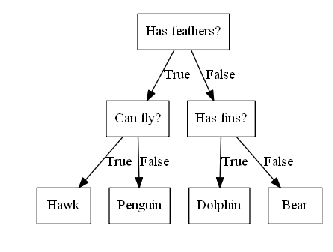

In [5]:
mglearn.plots.plot_animal_tree()

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [8]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Acc pada training set:", tree.score(X_train, y_train))
print("Acc pada test set:", tree.score(X_test, y_test))

Acc pada training set: 1.0
Acc pada test set: 0.9370629370629371


In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Acc pada training set:", tree.score(X_train, y_train))
print("Acc pada test set:", tree.score(X_test, y_test))

Acc pada training set: 0.9882629107981221
Acc pada test set: 0.951048951048951


In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

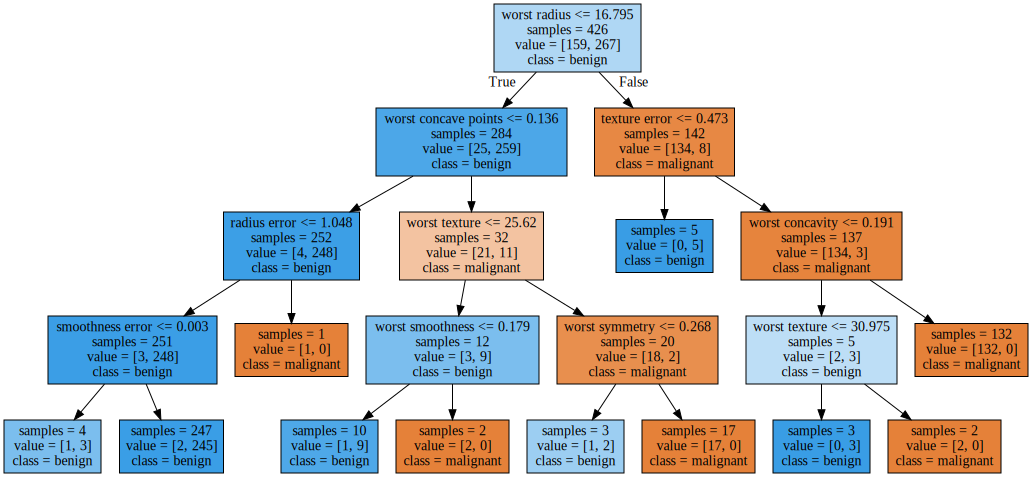

In [12]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

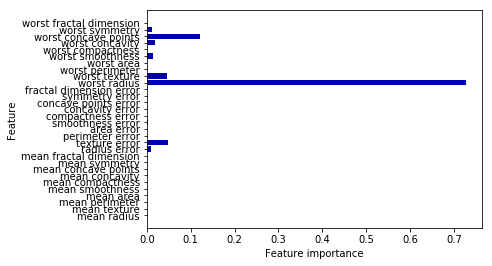

In [19]:

plot_feature_importances_cancer(tree)